## Ocean Drift Diagnostics

### Import Modules

In [1]:
import sys
#sys.path.insert(0, '../..')
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
from ocean3d import check_variable_name
from ocean3d import hovmoller_plot
from ocean3d import time_series

from ocean3d import multilevel_trend
from ocean3d import zonal_mean_trend

### Import Data

Here we read one of the reference NextGEMS Cycle 3 simulations
And we extract the Potential Temperature and Practical Salinity fields, resampling in yearly means (as these are more adequate to identify drifts as they are not contaminated by seasonal cycle signals)

In [7]:
reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")

data = reader.retrieve().resample(time="1Y").mean()
data = check_variable_name(data)

data

2024-04-16 19:10:09 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


2024-04-16 19:10:10 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-04-16 19:10:10 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-04-16 19:10:16 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC


<xarray.Dataset>
Dimensions:     (time: 13, lev: 75, lat: 180, lon: 360)
Coordinates:
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lev         (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level   (lev) int64 dask.array<chunksize=(75,), meta=np.ndarray>
  * time        (time) datetime64[ns] 1990-12-31 1991-12-31 ... 2002-12-31
Data variables:
    avg_so      (time, lev, lat, lon) float64 dask.array<chunksize=(1, 75, 180, 360), meta=np.ndarray>
    avg_thetao  (time, lev, lat, lon) float64 dask.array<chunksize=(1, 75, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2024-04-16 19:10:16 AQUA💧: Retrieved from IFS-NEMO_historical...

In [9]:
o3d_request= {'model':'IFS-NEMO',
'exp':'historical-1990',
'source': 'lra-r100-monthly',
'data': data,
'region':'Atlantic Ocean',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
'output_dir':'./output'}

### Functions:
All functions (primary and secondary) can be found in ocean_drift

First you must have cofig/o3d_request looks like above in order to use this fucntions.


The four main diagnostic functions are:
1. ##### hovmoller_plot

hovmoller_plot(o3d_request)

This function produces hovmollers in depth and time of yearly potential ocean temperature and practical salinity spatially averaged over a predefined ocean region or a customised lat-lon box. Its intended to be used only with model data goal and its goal is to help identify potential drifts at different ocean levels.

It requires you to provide: 
- A file with model data of 3D ocean potential temperature and practical salinity
- The specific region over which the spatial average is computed (or to provide a custom latxlon box instead)



2. ##### time_series
time_series(o3d_request)

This function produces timeseries of yearly potential ocean temperature and practical salinity spatially averaged over a predefined ocean region or a customised lat-lon box for a set of selected levels. Its intended to be used only with model data goal and its goal is to help identify potential drifts at different ocean levels.

It requires you to provide: 
- A file with model data of 3D ocean potential temperature and practical salinity
- The specific region over which the spatial average is computed (or to provide a custom latxlon box instead)
- The choice on the vertical levels to include in the plot (by default: 0, 100, 500, 1000, 2000, 3000, 4000, 5000)


3. ##### multilevel_trend
multilevel_trend(o3d_request)

This function produces plots with the linear trends in time at the grid point levels for a set of selected levels. It helps to identify the areas and depths where the stronger trends (and potential drifts) are developping.

It requires you to provide: 
- A file with model data of 3D ocean potential temperature and practical salinity
- The specific region to be shown in the plots
- The choice on the vertical levels to include in the plot (by default: 10, 100, 500, 1000, 3000, 5000)

4. ##### zonal_mean_trend_plot
zonal_mean_trend_plot(o3d_request):

This function produces plots of zonally averaged linear trends in time as a function of depth and latitude over a selected region. It helps to identify the latitudes and depths where the stronger trends (and potential drifts) are developping.

It requires you to provide: 
- A file with model data of 3D ocean potential temperature and practical salinity
- The specific region over which the zonal averages are computed and shown


This example is for the function that plots hovmoller plot of Atlantic ocean spatially averaged  of ocpt and so 

/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/AQUA/diagnostics/ocean3d/ocean3d/ocean_drifts/hovmoller_plot.py:180: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i,0].set_xticklabels(axs[i,0].get_xticklabels(), rotation=30)
/home/b/b382397/AQUA/diagnostics/ocean3d/ocean3d/ocean_drifts/hovmoller_plot.py:181: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

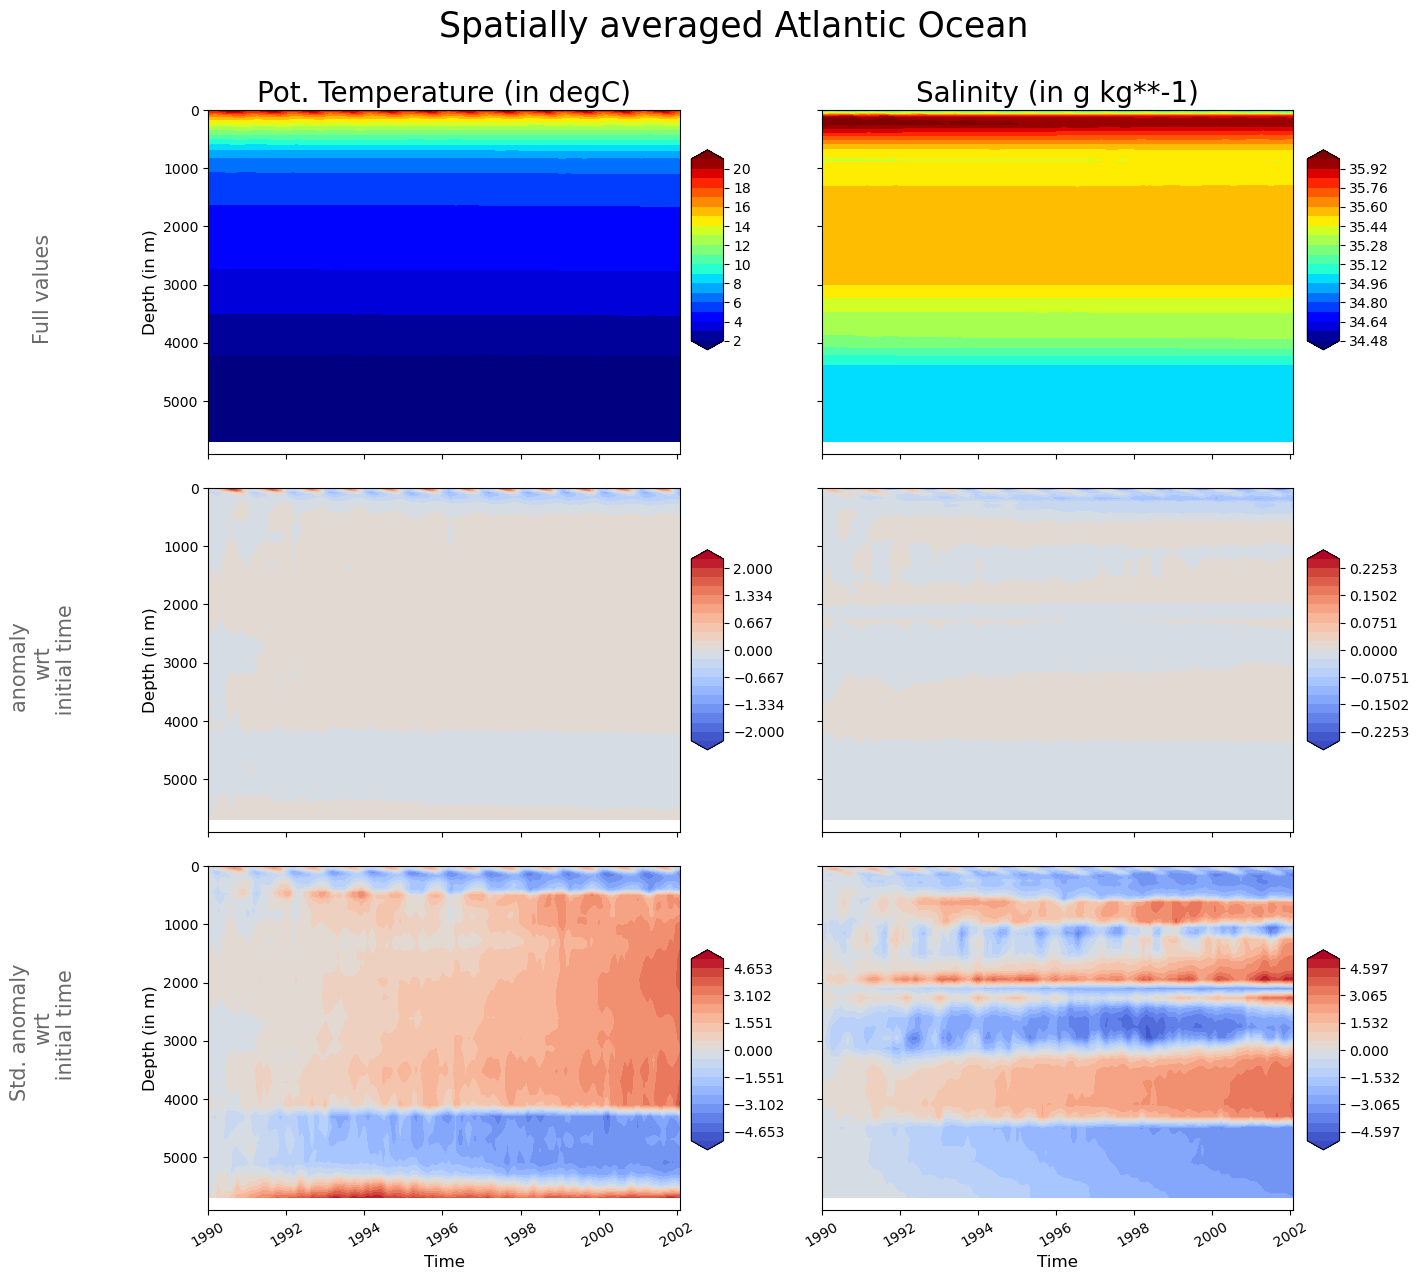

In [4]:
hovmoller_plot_init = hovmoller_plot(o3d_request)
hovmoller_plot_init.plot() 

This example is for the function that plots timeseries of Atlantic ocean averaged  of ocpt and so at the default depth levels

/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/AQUA/diagnostics/ocean3d/ocean3d/ocean_drifts/time_series.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i,0].set_xticklabels(axs[i,0].get_xticklabels(), rotation=30)
/home/b/b382397/AQUA/diagnostics/ocean3d/ocean3d/ocean_drifts/time_series.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i,1].set_xticklabels(axs[i,0].get_xticklabels(), rotation=30)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


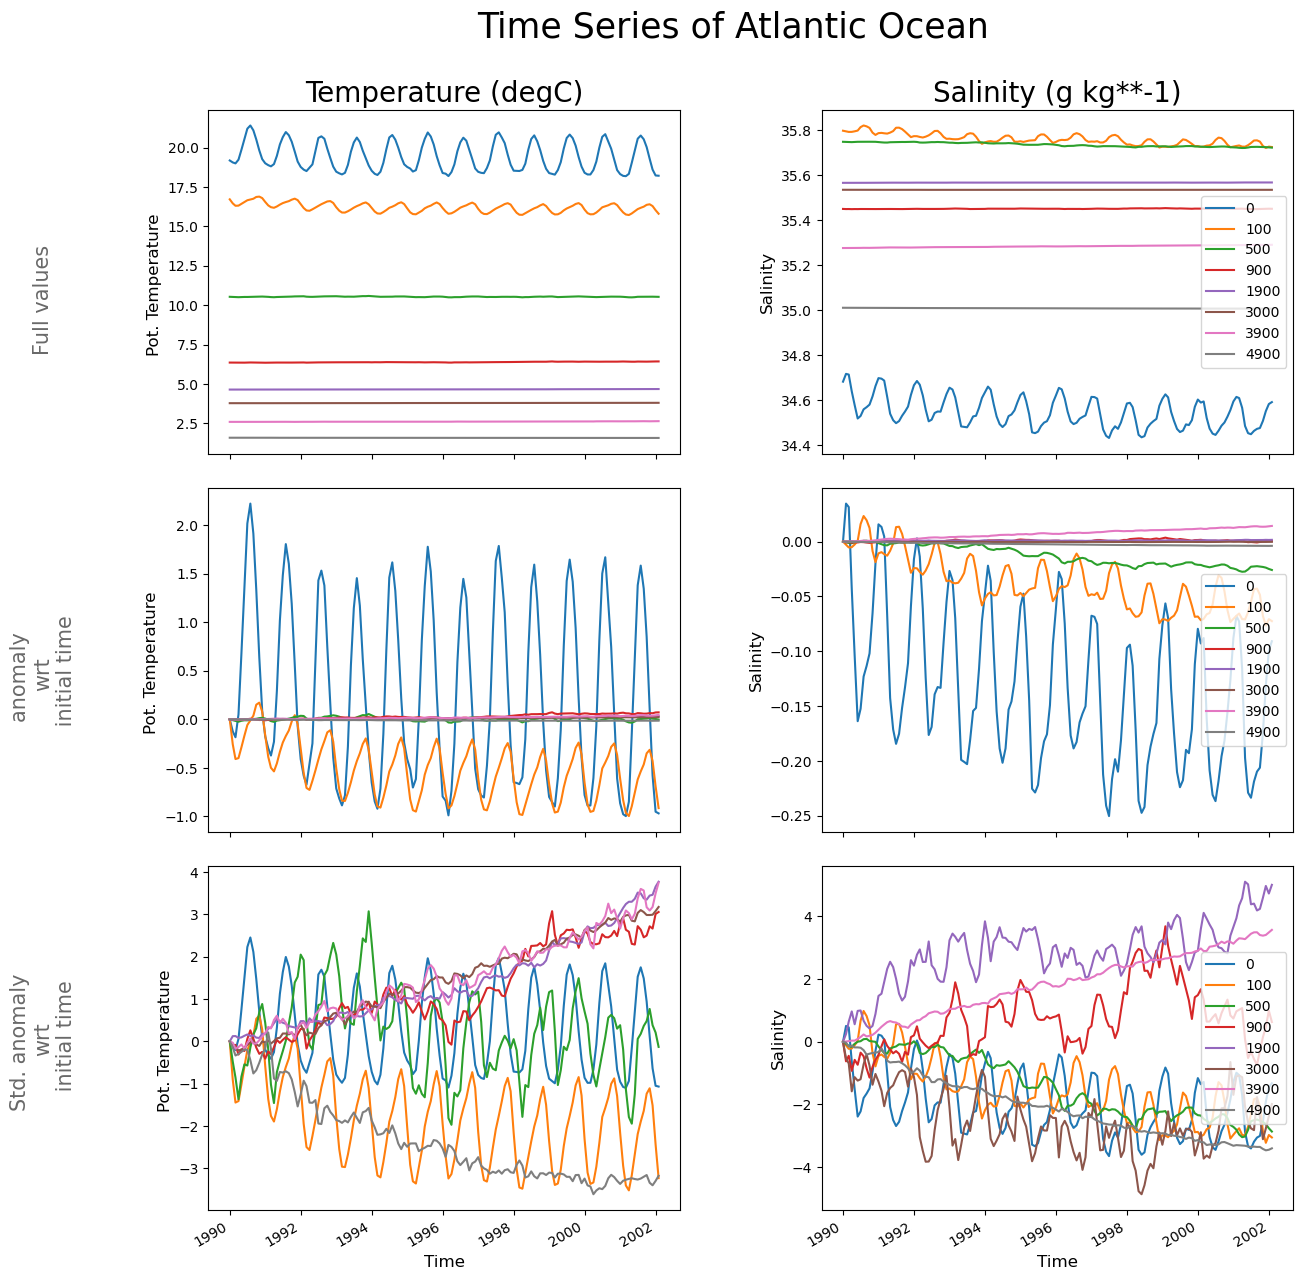

In [5]:
time_ser = time_series(o3d_request)
time_ser.plot()

This is an example for the function that plots maps of temporal trends (computed for all years in the dataset) and plots them for the whole Atlantic Ocean for the default list of vertical levels

/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invali

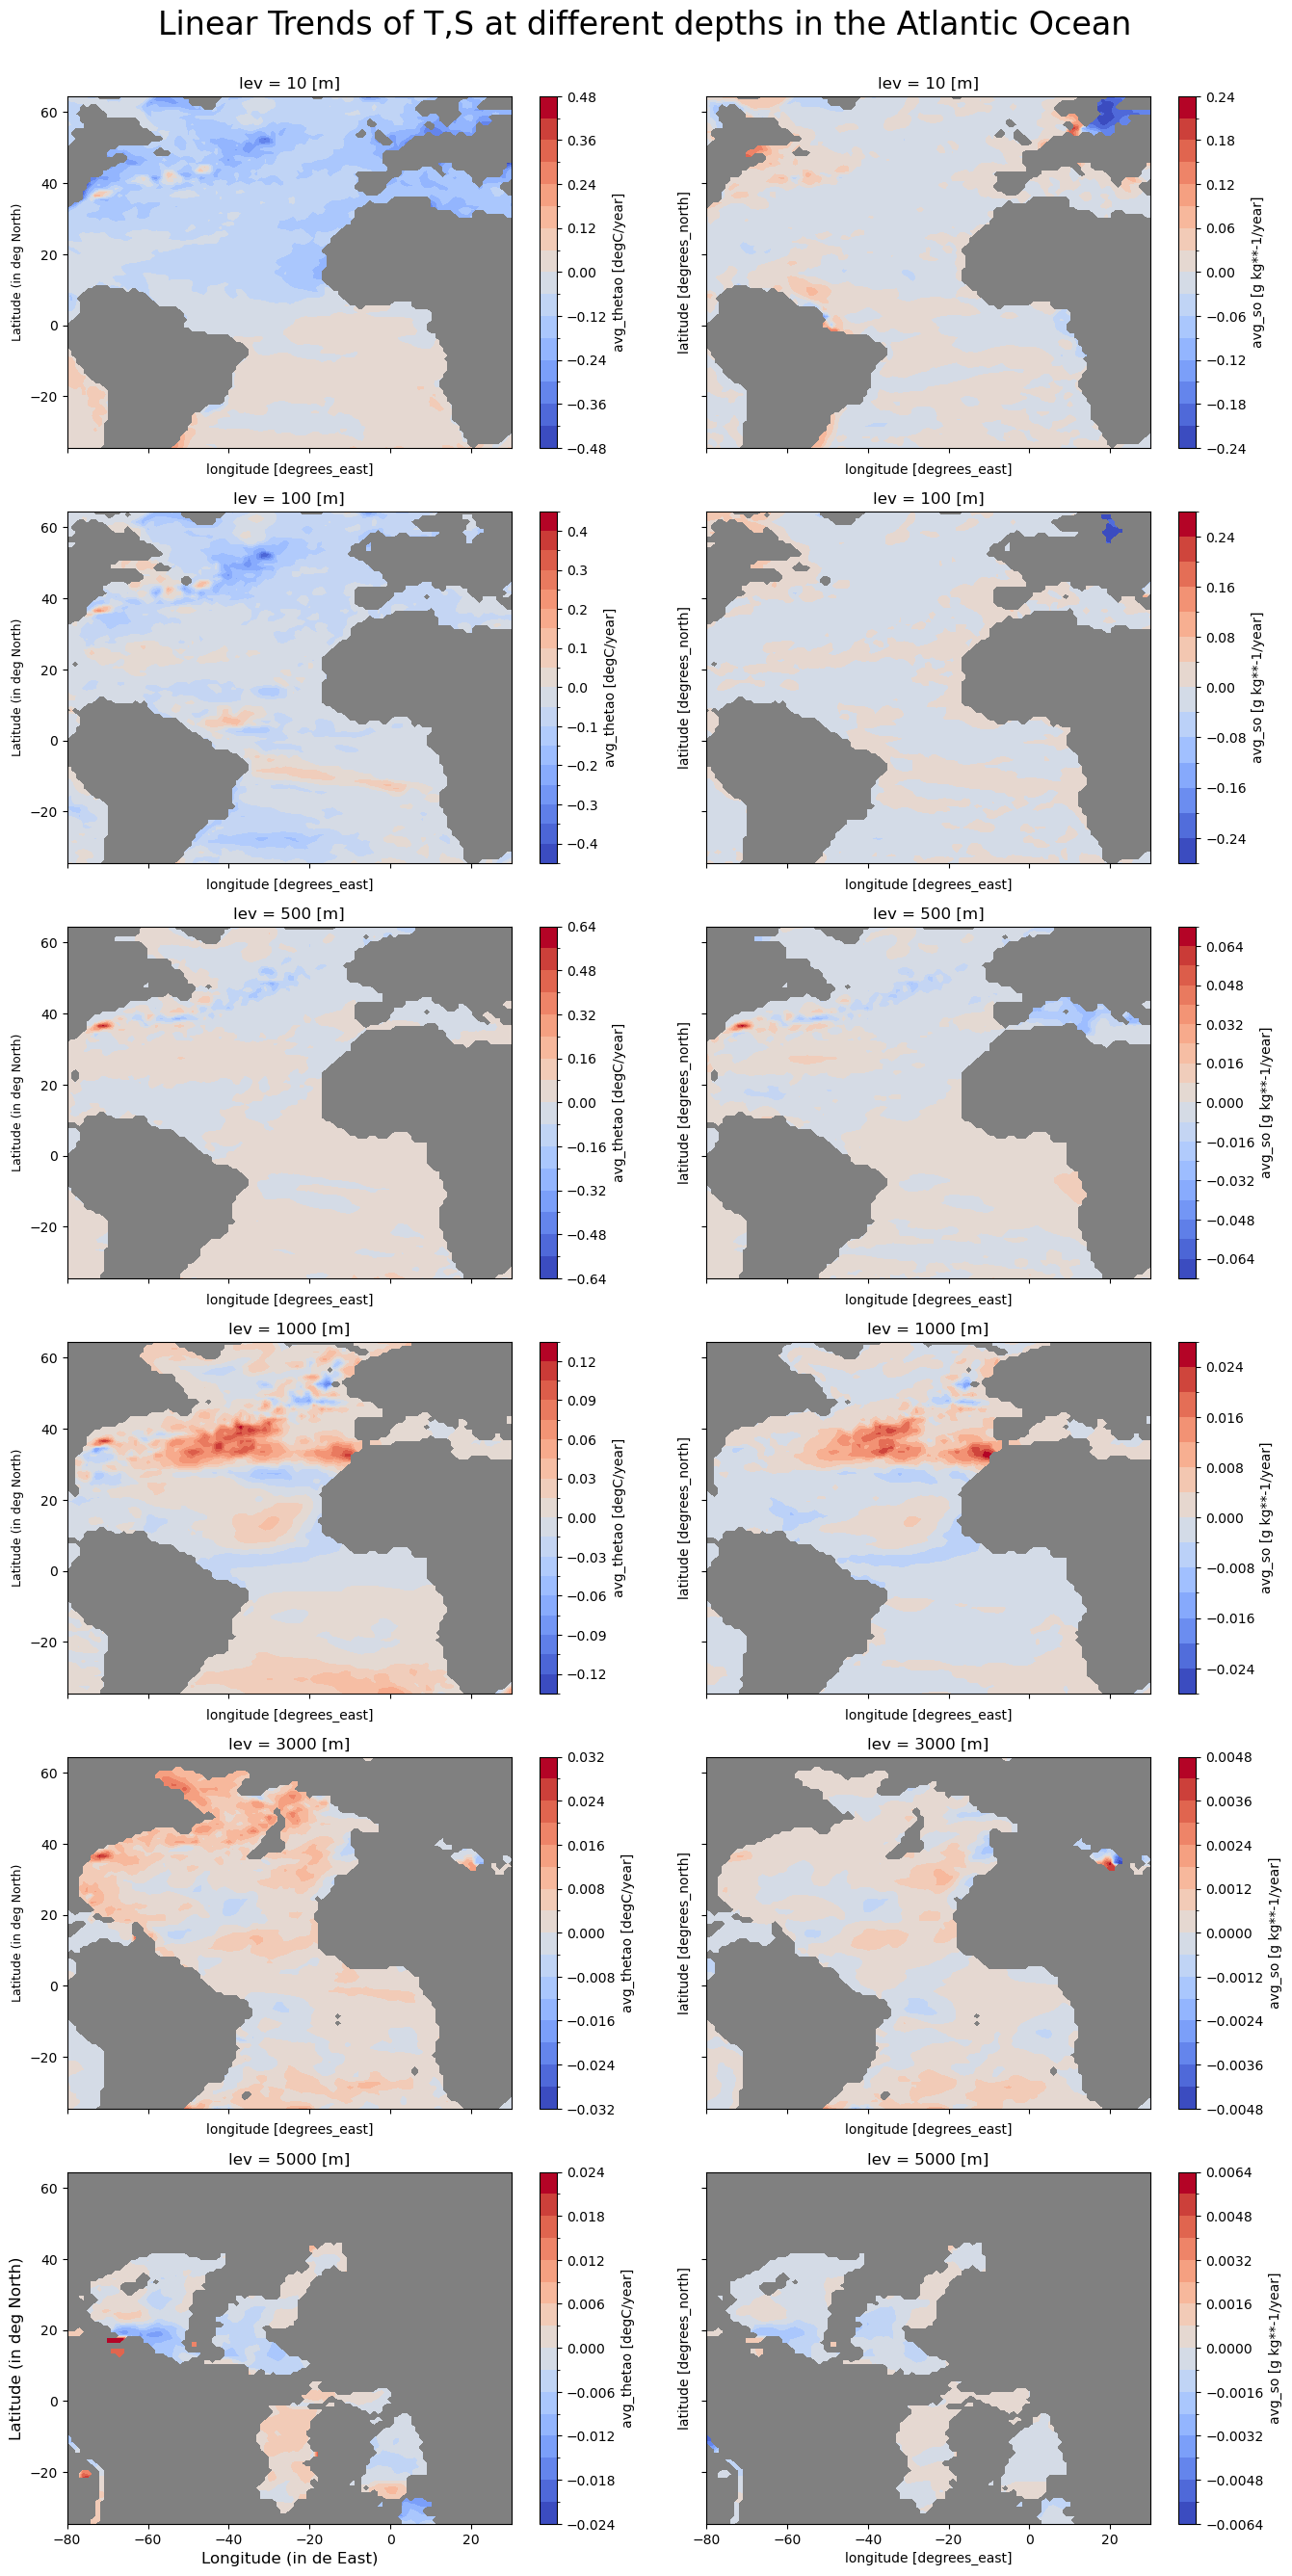

In [11]:
trend = multilevel_trend(o3d_request)
trend.plot()


This is another example for the function that plots maps of temporal trends (computed for all years in the dataset) cropped now to the Atlantic Ocean and shown for a customised list of levels

/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invali

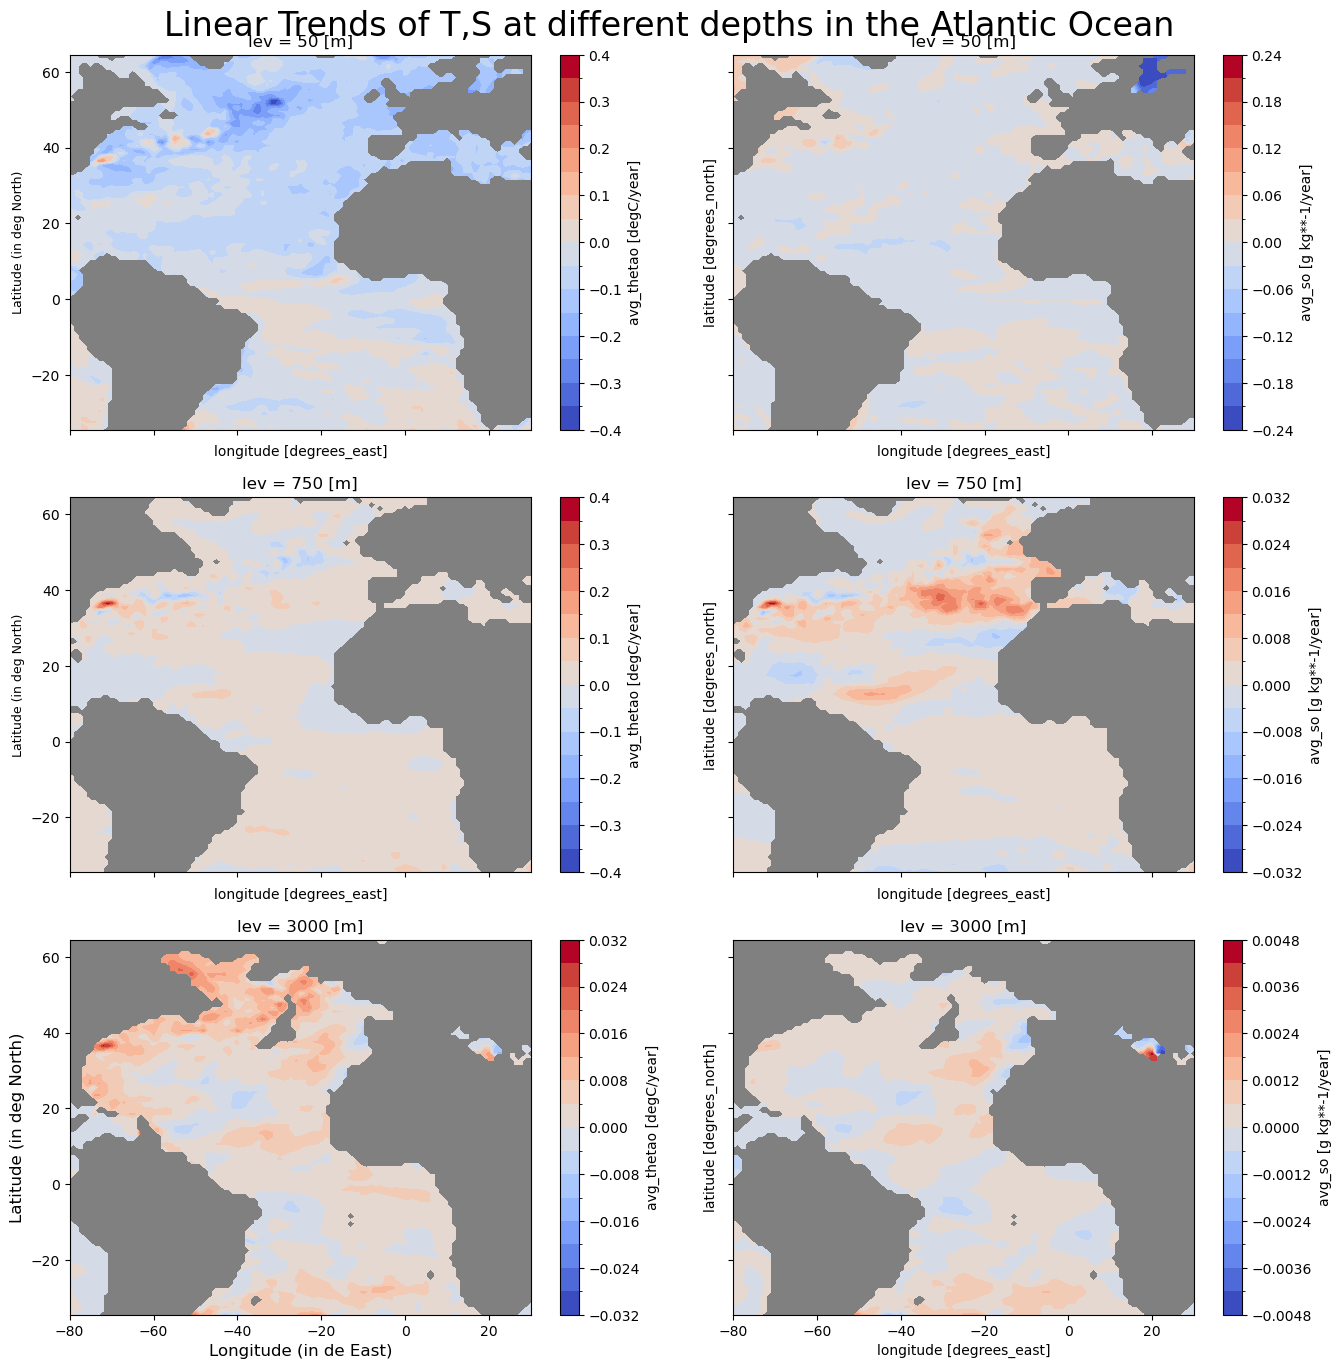

In [12]:
o3d_request["customise_level"]=True
o3d_request["levels"]=[50, 750, 3000] 
trend = multilevel_trend(o3d_request)
trend.plot()


This is an example for the function that plots zonally averaged linear trends of T, S as a function of depth and latitude in this case for the Atlantic Ocean

/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/b/b382397/.conda/envs/aqua/lib/python3.12/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


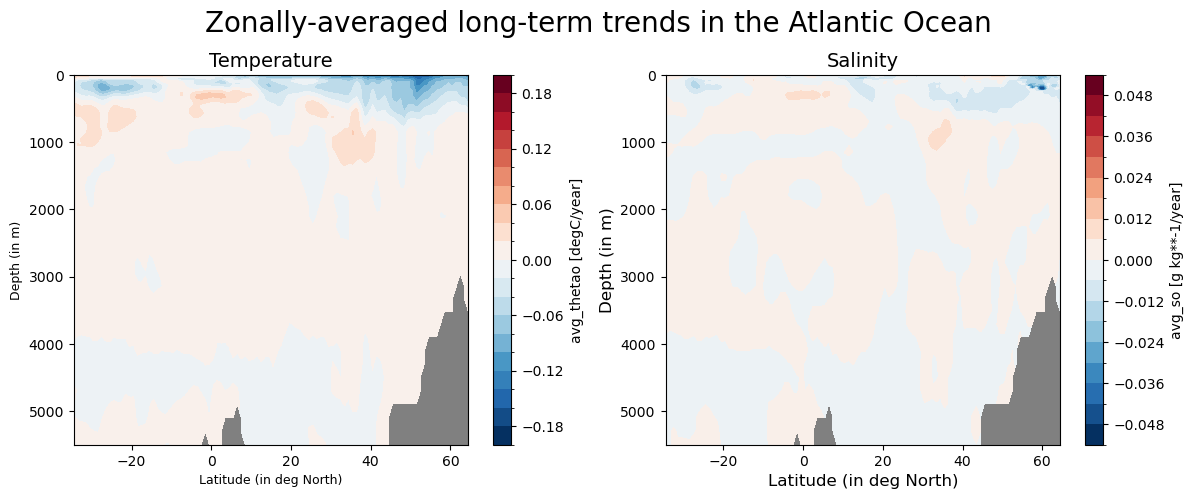

In [13]:
zonal_trend = zonal_mean_trend(o3d_request)
zonal_trend.plot()